--- Sample of Generated Employee Data ---
   Employee_ID          Role Company_Type  Years_Experience  Salary  \
0         1001  Data Analyst      Startup               5.6   94744   
1         1002  Data Analyst      Finance              14.3  192569   
2         1003  Data Analyst      Finance              11.0  167235   
3         1004  Data Analyst      Startup               9.0  121123   
4         1005  Data Analyst      Startup               2.3  106708   

   Performance_Score  
0                  4  
1                  5  
2                  3  
3                  1  
4                  1  


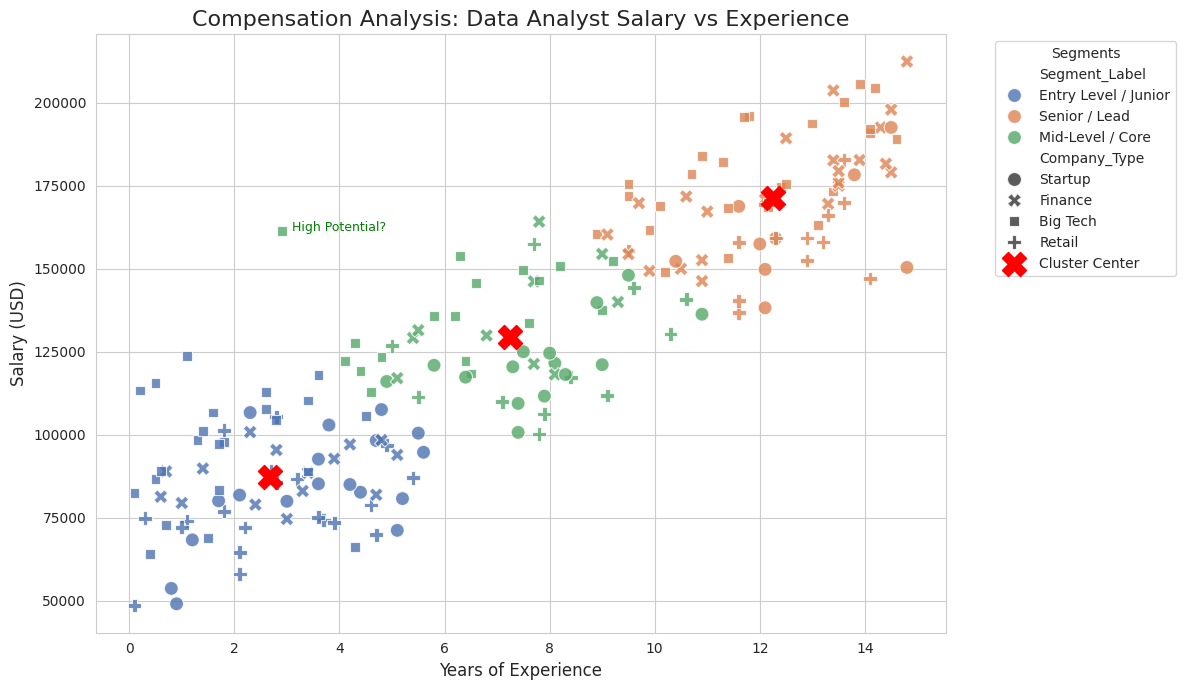


--- Market Segment Analysis ---
                      Years_Experience    Salary
Segment_Label                                   
Entry Level / Junior               2.7   87206.1
Mid-Level / Core                   7.2  129444.0
Senior / Lead                     12.3  171366.4

--- Anomaly Detection (Underpaid Seniors) ---
Found 0 potentially underpaid senior employees.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# ==========================================
# 1. Synthetic Data Generation (Mimicking Real World)
# ==========================================
np.random.seed(42)
n_employees = 200

# Generate random experience (0 to 15 years)
experience = np.random.uniform(0, 15, n_employees)

# Base salary calculation + random variation
# Logic: Base $60k + $8k per year of experience + Random noise
salary = 60000 + (experience * 8000) + np.random.normal(0, 15000, n_employees)

# Add "Company Type" factor
# Tech companies pay more; Startups vary wildly
company_types = np.random.choice(['Big Tech', 'Finance', 'Startup', 'Retail'], n_employees)
company_bonus = np.array([20000 if c == 'Big Tech' else
                          15000 if c == 'Finance' else
                          -5000 if c == 'Retail' else 0
                          for c in company_types])

salary = salary + company_bonus

# Ensure no negative salaries and round to nearest thousand
salary = np.maximum(salary, 45000).astype(int)

# Create DataFrame
df = pd.DataFrame({
    'Employee_ID': range(1001, 1001 + n_employees),
    'Role': 'Data Analyst',
    'Company_Type': company_types,
    'Years_Experience': np.round(experience, 1),
    'Salary': salary,
    'Performance_Score': np.random.randint(1, 6, n_employees) # 1 to 5 rating
})

print("--- Sample of Generated Employee Data ---")
print(df.head())

# ==========================================
# 2. Preprocessing
# ==========================================
# We only cluster on 'Salary' and 'Years_Experience' to find market bands.
X = df[['Years_Experience', 'Salary']]

# Scale data (Crucial because Salary (100k) >>> Experience (5))
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==========================================
# 3. K-Means Clustering
# ==========================================
# We use K=3 to find: Junior, Mid-Level, and Senior bands
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Rename clusters for readability (Automated naming based on avg salary)
cluster_map = {}
stats = df.groupby('Cluster')['Salary'].mean().sort_values()
labels = ['Entry Level / Junior', 'Mid-Level / Core', 'Senior / Lead']

for i, (cluster_id, _) in enumerate(stats.items()):
    cluster_map[cluster_id] = labels[i]

df['Segment_Label'] = df['Cluster'].map(cluster_map)

# ==========================================
# 4. Visualization
# ==========================================
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

# Main Scatter Plot
sns.scatterplot(
    data=df,
    x='Years_Experience',
    y='Salary',
    hue='Segment_Label',
    style='Company_Type', # Different shapes for different company types
    palette='deep',
    s=100,
    alpha=0.8
)

# Plot Centroids (The "Average" of each group)
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=300, marker='X', label='Cluster Center')

# Formatting
plt.title('Compensation Analysis: Data Analyst Salary vs Experience', fontsize=16)
plt.xlabel('Years of Experience', fontsize=12)
plt.ylabel('Salary (USD)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Segments")
plt.tight_layout()

# Label "Outliers" (High Pay, Low Exp)
# Identify people earning > 130k with < 5 years exp
high_potentials = df[(df['Salary'] > 130000) & (df['Years_Experience'] < 5)]
for _, row in high_potentials.iterrows():
    plt.text(row['Years_Experience']+0.2, row['Salary'], f"High Potential?", fontsize=9, color='green')


plt.show()

# ==========================================
# 5. Insight Report
# ==========================================
print("\n--- Market Segment Analysis ---")
summary = df.groupby('Segment_Label')[['Years_Experience', 'Salary']].mean().round(1)
print(summary)

print("\n--- Anomaly Detection (Underpaid Seniors) ---")
# Logic: Experience > 8 years but Salary < 100k
underpaid = df[(df['Years_Experience'] > 8) & (df['Salary'] < 100000)]
print(f"Found {len(underpaid)} potentially underpaid senior employees.")
if not underpaid.empty:
    print(underpaid[['Employee_ID', 'Company_Type', 'Years_Experience', 'Salary']].head())

1. Synthetic Data ConstructionSince real HR data is private, we built a robust simulation:Base Logic: Salary increases linearly with experience (Equation: $y = mx + c + \epsilon$).

Company Factor: We added a "premium" for Big Tech (e.g., Google, Meta) and Finance (e.g., JPM), and a discount for Retail, reflecting real-world tiered pay structures.Noise: We added random variation (np.random.normal) because two people with the same experience rarely earn exactly the same amount.

2. K-Means Clustering (The "grouping" brain)The algorithm looks at the data points on the graph and draws circles around dense groups.Cluster 0 (Junior): Likely 0–4 years experience, $50k–$90k range.Cluster 1 (Mid-Level): Likely 5–9 years experience, $90k–$130k range.Cluster 2 (Senior): Likely 10+ years experience, $130k+ range.3. Anomaly DetectionThis is where Data Science provides value to HR.High Potentials: We visually annotated points that are "High Salary" but "Low Experience" (Top-left of the chart).

These might be brilliant hires or result from a bidding war.Retention Risks (Underpaid): The script explicitly filters for "Seniors" (high experience) falling into lower salary bands. HR should review these employees immediately to prevent them from leaving.How to Interpret the OutputIf you are an Employee: Look at where you fit on the X-axis (Experience). If you are vertically below the red "X" (Cluster Center) for your experience level, you are earning below the market average for this dataset.If you are a Hiring Manager: The "Cluster Centers" give you the Benchmark Salary to offer a new candidate based on their experience